# Nama: Nadya Dwi Zalsabila Usman
# NIM: 5312422010
# Matkul: Pengolahan Sinyal Digital

In [ ]:
!pip install scikit-dsp-comm scipy

In [ ]:
%pylab inline
import sk_dsp_comm.sigsys as ss
import sk_dsp_comm.fir_design_helper as fir_d
import sk_dsp_comm.iir_design_helper as iir_d
import sk_dsp_comm.multirate_helper as mrh
import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


In [ ]:
%config InlineBackend.figure_formats=['svg'] # SVG inline viewing

# Penjelasan program

Menggunakan Modul Pendukung untuk Mendesain Filter

Daripada mengandalkan hanya paket Scipy `signal` untuk merancang filter digital, ada pilihan alternatif yang berguna yang dapat dieksplorasi, yaitu menggunakan modul desain filter yang terdapat di `scikit-dsp-comm`. Ini memberikan akses tambahan ke berbagai algoritma dan teknik desain filter yang dapat digunakan untuk memenuhi kebutuhan spesifik dalam pemrosesan sinyal digital. Dengan menggunakan modul ini sebagai pendamping, Anda dapat memperluas kemungkinan desain filter Anda dan memiliki lebih banyak kontrol terhadap karakteristik filter yang dihasilkan.

Desain filter dalam domain digital dapat dipermudah dengan bantuan paket Scipy `signal`, namun terdapat alternatif yang menarik, yaitu modul desain filter yang tersedia dalam `scikit-dsp-comm`. Modul ini memungkinkan desain filter FIR (Finite Impulse Response) dan IIR (Infinite Impulse Response) yang dimulai dengan spesifikasi respons amplitudo, termasuk frekuensi kritis passband dan stopband, serta persyaratan terkait riak dan redaman. Setelah spesifikasi ditetapkan, modul ini menentukan jumlah taps/koefisien (untuk FIR) atau orde filter (untuk IIR) yang dibutuhkan, dan mengembalikan koefisien filter dalam bentuk array `b` untuk FIR, atau array `b`, `a`, dan array 2D `sos` yang berisi informasi tentang struktur orde kedua untuk filter IIR.

Dalam kasus filter FIR, respons filter dalam domain $z$ dapat diwakili sebagai persamaan:

$$
H_\text{FIR}(z) = \sum_{k=0}^N b_k z^{-k}
$$

dengan array `b` yang menyimpan koefisien filter pembilang $[b_0, b_1, ..., b_N]$. Sedangkan untuk filter IIR, persamaannya adalah sebagai berikut:

$$
H_\text{IIR}(z) = \frac{\sum_{k=0}^M b_k z^{-k}}{\sum_{k=1}^N a_k z^{-k}} = \prod_{k=0}^{N_s-1} H_k(z)
$$

di mana $N_s = \lfloor(N+1)/2\rfloor$. Untuk filter IIR dalam bentuk `b/a`, koefisien filter pembilang dan penyebut disusun dalam larik `b` dan `a`. Sedangkan untuk bentuk `sos`, setiap baris matriks `sos` 2D berkaitan dengan koefisien $H_k(z)$ yang sesuai.

Desain filter digital sering dimulai dengan spesifikasi respons amplitudo yang diinginkan, yang mencerminkan bagaimana filter seharusnya merespons berbagai frekuensi. Spesifikasi ini mencakup penguatan dalam passband dan redaman dalam stopband, yang dinyatakan dalam desibel (dB). Modul scikit-dsp-comm memungkinkan perancang untuk merancang filter FIR sesuai dengan persyaratan respons amplitudo yang ditetapkan, memungkinkan implementasi yang efisien dan optimal dalam aplikasi pemrosesan sinyal digital dengan mengoptimalkan karakteristik filter sesuai spesifikasi yang diinginkan.


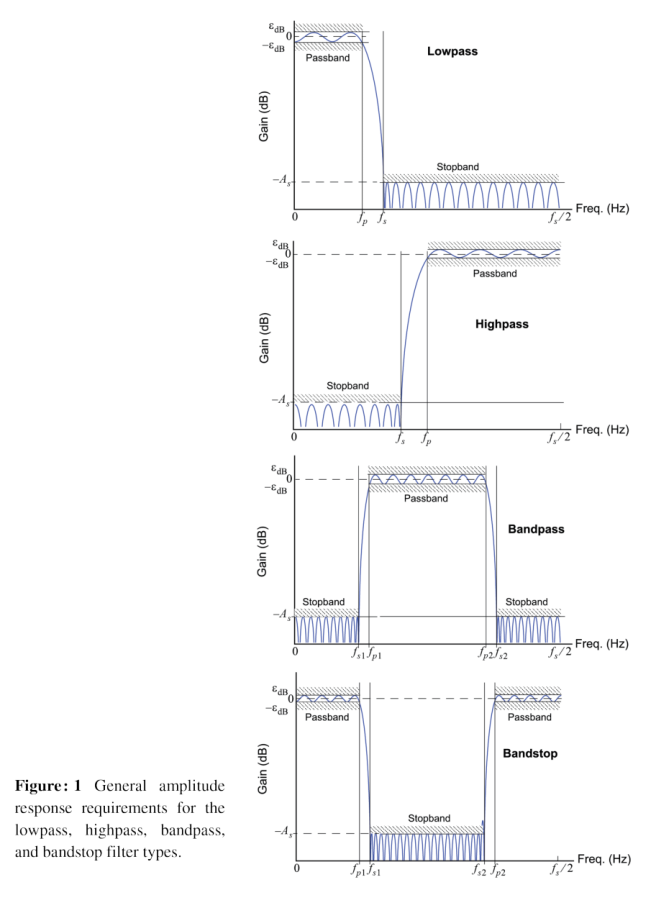

In [ ]:
img = mpimg.imread('1.png')
plt.figure(figsize=(20, 16))
plt.imshow(img)
plt.axis('off')
plt.show()

# Penjelasan program
Program ini menggunakan Matplotlib dan modul `mpimg` untuk memuat dan menampilkan gambar yang disimpan dalam file '1.png'. Pertama, gambar dimuat menggunakan fungsi `mpimg.imread()` dan disimpan dalam variabel `img`. Selanjutnya, sebuah figure baru dengan ukuran 20x16 inci dibuat menggunakan `plt.figure(figsize=(20, 16))`. Gambar dimasukkan ke dalam plot menggunakan `plt.imshow(img)`, dan sumbu gambar dihilangkan dengan `plt.axis('off')`. Akhirnya, gambar ditampilkan dengan `plt.show()`.
# Penjelasan output
Output dari program ini adalah gambar yang dimuat dari file '1.png'. Gambar tersebut ditampilkan dalam plot Matplotlib dengan ukuran 20x16 inci dan sumbu gambar dihilangkan. Gambar tersebut akan muncul di jendela pop-up atau output jika program dijalankan di lingkungan yang mendukung GUI.

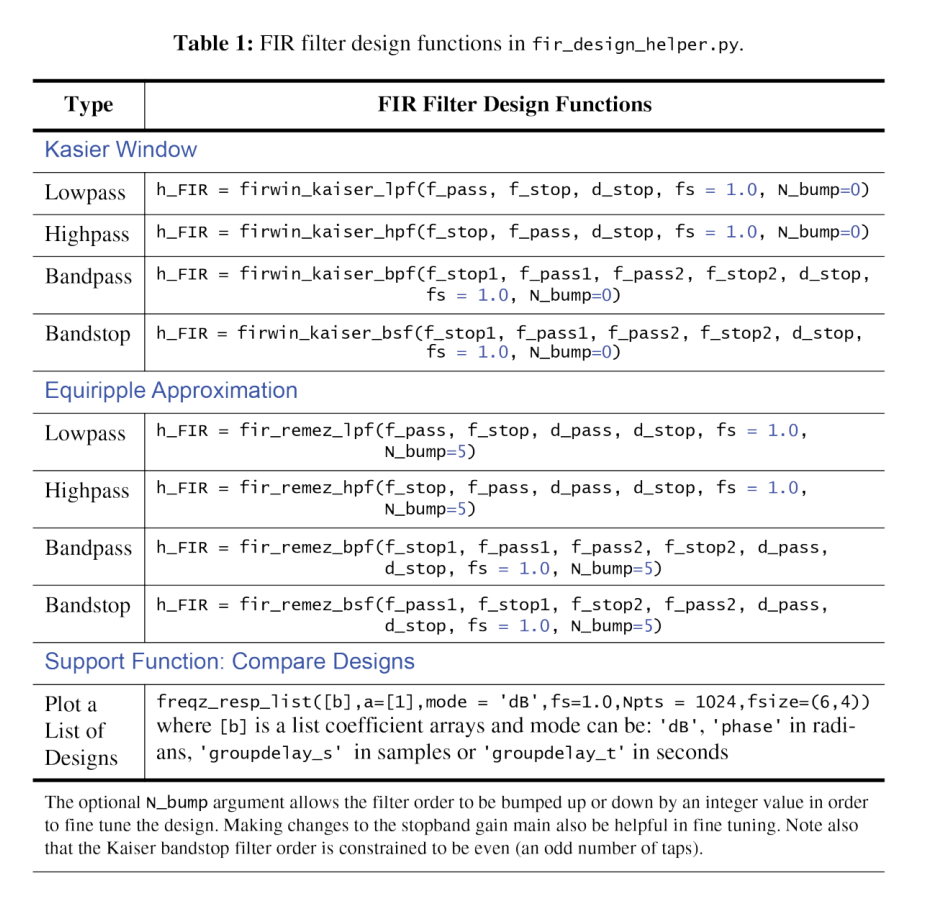

In [ ]:
img = mpimg.imread('2.png')
plt.figure(figsize=(20, 16))
plt.imshow(img)
plt.axis('off')
plt.show()

# Penjelasan program
Program ini menggunakan Matplotlib dan modul `mpimg` untuk memuat dan menampilkan gambar yang disimpan dalam file '2.png'. Pertama, gambar dimuat menggunakan fungsi `mpimg.imread()` dan disimpan dalam variabel `img`. Selanjutnya, sebuah figure baru dengan ukuran 20x16 inci dibuat menggunakan `plt.figure(figsize=(20, 16))`. Gambar dimasukkan ke dalam plot menggunakan `plt.imshow(img)`, dan sumbu gambar dihilangkan dengan `plt.axis('off')`. Akhirnya, gambar ditampilkan dengan `plt.show()`.
# Penjelasan output
Output dari program ini adalah gambar yang dimuat dari file '2.png'. Gambar tersebut ditampilkan dalam plot Matplotlib dengan ukuran 20x16 inci dan sumbu gambar dihilangkan. Gambar tersebut akan muncul di jendela pop-up atau output jika program dijalankan di lingkungan yang mendukung GUI.

## Contoh Desain

### Contoh 1: Lowpass dengan $f_s = 1$ Hz
Untuk 31 filter di sini, kami memilih frekuensi cutoff menjadi $F_c = F_s/8$, atau dalam bentuk normal $f_c = 1/8$.

In [ ]:
b_k = fir_d.firwin_kaiser_lpf(1/8,1/6,50,1.0)
b_r = fir_d.fir_remez_lpf(1/8,1/6,0.2,50,1.0)

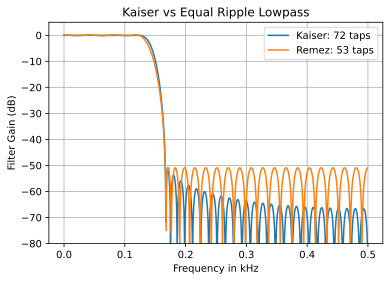

In [ ]:
fir_d.freqz_resp_list([b_k,b_r],[[1],[1]],'dB',fs=1)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Lowpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k),r'Remez: %d taps' % len(b_r)),loc='best')
grid();

# Penjelasan program
Program ini menggunakan modul `fir_design_helper` (diasumsikan sebagai `fir_d`) untuk merancang dua filter FIR (Finite Impulse Response) dengan spesifikasi yang berbeda, yaitu filter lowpass menggunakan metode Kaiser dan metode Equal Ripple (Remez). Pertama, filter lowpass dengan metode Kaiser dirancang menggunakan fungsi `firwin_kaiser_lpf()` dengan parameter-parameter yang diberikan, seperti lebar pita stopband, lebar pita passband, redaman dalam stopband, jumlah taps, dan frekuensi sampling. Kemudian, filter lowpass dengan metode Equal Ripple dirancang menggunakan fungsi `fir_remez_lpf()` dengan parameter-parameter yang serupa. Setelah kedua filter dirancang, respons frekuensinya diproses menggunakan fungsi `freqz_resp_list()`, yang menerima daftar koefisien filter, daftar koefisien penyebut (untuk filter FIR, hanya berisi `[1]`), dan unit yang diinginkan untuk respons frekuensi (dalam dB). Fungsi ini juga menerima frekuensi sampling sebagai argumen. Setelah itu, parameter plot disesuaikan, seperti batas sumbu y, judul, label sumbu, legenda, dan grid, sebelum plot ditampilkan.
# Penjelasan output
Output dari program ini adalah sebuah plot yang membandingkan respons frekuensi dari dua filter FIR yang dirancang menggunakan metode Kaiser dan metode Equal Ripple. Plot menunjukkan penguatan filter (dalam dB) terhadap frekuensi dalam kiloHertz. Legenda pada plot menjelaskan jumlah taps dari masing-masing filter, dan grid digunakan untuk memudahkan interpretasi plot. Dari plot ini, pengguna dapat melihat bagaimana respons frekuensi dari kedua filter berbeda, serta membandingkan performa keduanya dalam memenuhi spesifikasi desain filter yang diberikan.

In [ ]:
b_k_hp = fir_d.firwin_kaiser_hpf(1/8,1/6,50,1.0)
b_r_hp = fir_d.fir_remez_hpf(1/8,1/6,0.2,50,1.0)

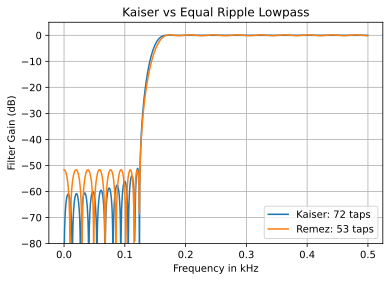

In [ ]:
fir_d.freqz_resp_list([b_k_hp,b_r_hp],[[1],[1]],'dB',fs=1)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Lowpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k),r'Remez: %d taps' % len(b_r)),loc='best')
grid();

# Penjelasan program
Program ini menggunakan modul `fir_design_helper` (diasumsikan sebagai `fir_d`) untuk merancang dua filter FIR (Finite Impulse Response) dengan spesifikasi yang berbeda, yaitu filter highpass menggunakan metode Kaiser dan metode Equal Ripple (Remez). Pertama, filter highpass dengan metode Kaiser dirancang menggunakan fungsi `firwin_kaiser_hpf()` dengan parameter-parameter yang diberikan, seperti lebar pita stopband, lebar pita passband, redaman dalam stopband, jumlah taps, dan frekuensi sampling. Kemudian, filter highpass dengan metode Equal Ripple dirancang menggunakan fungsi `fir_remez_hpf()` dengan parameter-parameter yang serupa. Setelah kedua filter dirancang, respons frekuensinya diproses menggunakan fungsi `freqz_resp_list()`, yang menerima daftar koefisien filter, daftar koefisien penyebut (untuk filter FIR, hanya berisi `[1]`), dan unit yang diinginkan untuk respons frekuensi (dalam dB). Fungsi ini juga menerima frekuensi sampling sebagai argumen. Setelah itu, parameter plot disesuaikan, seperti batas sumbu y, judul, label sumbu, legenda, dan grid, sebelum plot ditampilkan.
# Penjelasan output
Output dari program ini adalah sebuah plot yang membandingkan respons frekuensi dari dua filter FIR yang dirancang menggunakan metode Kaiser dan metode Equal Ripple. Plot menunjukkan penguatan filter (dalam dB) terhadap frekuensi dalam kiloHertz. Legenda pada plot menjelaskan jumlah taps dari masing-masing filter, dan grid digunakan untuk memudahkan interpretasi plot. Dari plot ini, pengguna dapat melihat bagaimana respons frekuensi dari kedua filter berbeda, serta membandingkan performa keduanya dalam memenuhi spesifikasi desain filter yang diberikan.

In [ ]:
b_k_bp = fir_d.firwin_kaiser_bpf(7000,8000,14000,15000,50,48000)
b_r_bp = fir_d.fir_remez_bpf(7000,8000,14000,15000,0.2,50,48000)

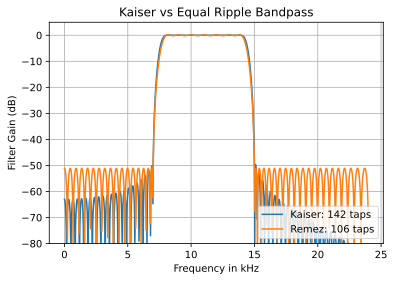

In [ ]:
fir_d.freqz_resp_list([b_k_bp,b_r_bp],[[1],[1]],'dB',fs=48)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Bandpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k_bp),
        r'Remez: %d taps' % len(b_r_bp)),
       loc='lower right')
grid();

# Penjelasan program
Program ini menggunakan modul `fir_design_helper` (diasumsikan sebagai `fir_d`) untuk merancang dua filter FIR (Finite Impulse Response) dengan spesifikasi yang berbeda, yaitu filter bandpass menggunakan metode Kaiser dan metode Equal Ripple (Remez). Pertama, filter bandpass dengan metode Kaiser dirancang menggunakan fungsi `firwin_kaiser_bpf()` dengan parameter-parameter yang diberikan, seperti frekuensi bawah dan atas dari bandpass, lebar pita stopband, lebar pita passband, jumlah taps, dan frekuensi sampling. Kemudian, filter bandpass dengan metode Equal Ripple dirancang menggunakan fungsi `fir_remez_bpf()` dengan parameter-parameter yang serupa. Setelah kedua filter dirancang, respons frekuensinya diproses menggunakan fungsi `freqz_resp_list()`, yang menerima daftar koefisien filter, daftar koefisien penyebut (untuk filter FIR, hanya berisi `[1]`), dan unit yang diinginkan untuk respons frekuensi (dalam dB). Fungsi ini juga menerima frekuensi sampling sebagai argumen. Setelah itu, parameter plot disesuaikan, seperti batas sumbu y, judul, label sumbu, legenda, dan grid, sebelum plot ditampilkan.
# Penjelasan output
Output dari program ini adalah sebuah plot yang membandingkan respons frekuensi dari dua filter FIR yang dirancang menggunakan metode Kaiser dan metode Equal Ripple. Plot menunjukkan penguatan filter (dalam dB) terhadap frekuensi dalam kiloHertz. Legenda pada plot menjelaskan jumlah taps dari masing-masing filter, dan grid digunakan untuk memudahkan interpretasi plot. Dari plot ini, pengguna dapat melihat bagaimana respons frekuensi dari kedua filter berbeda, serta membandingkan performa keduanya dalam memenuhi spesifikasi desain filter yang diberikan.

In [ ]:
b_up = fir_d.fir_remez_lpf(3300,4300,0.5,60,96000)

In [ ]:
mr_up = mrh.multirate_FIR(b_up)

### Pertimbangkan konfigurasi pole-nol untuk filter orde tinggi ini

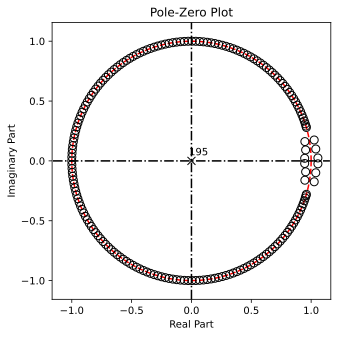

In [ ]:
# Lihatlah konfigurasi kutub-nol dari konfigurasi ini
# FIR fase linier orde tinggi (banyak ketukan)
mr_up.zplane()

# Penjelasan program
Program ini menggunakan modul `fir_design_helper` (diasumsikan sebagai `fir_d`) untuk merancang filter FIR (Finite Impulse Response) dengan metode Equal Ripple (Remez). Filter ini dirancang untuk operasi lowpass dengan batas bawah frekuensi 3300 Hz dan batas atas frekuensi 4300 Hz. Spesifikasi lainnya termasuk redaman dalam stopband sebesar 0.5 dB, 60 taps, dan frekuensi sampling 96000 Hz. Setelah filter dirancang, modul `multirate_FIR` (diasumsikan sebagai `mrh`) digunakan untuk menghasilkan filter FIR fase linier orde tinggi dengan banyak ketukan.

Setelah filter FIR fase linier orde tinggi dibuat, dilakukan visualisasi konfigurasi kutub-nol filter menggunakan metode `zplane()`. Metode ini memplot diagram kutub-nol dari filter, yang memberikan informasi visual tentang pola respon frekuensi dan karakteristik fase dari filter FIR yang dirancang.
# Penjelasan output
Output dari program ini adalah plot diagram kutub-nol dari filter FIR fase linier orde tinggi. Diagram ini memperlihatkan posisi kutub dan nol dalam bidang kompleks, yang memberikan gambaran tentang bagaimana filter merespon terhadap sinyal input dalam domain frekuensi dan domain waktu. Informasi yang diperoleh dari diagram kutub-nol ini dapat membantu dalam analisis dan pemahaman karakteristik filter FIR yang dirancang.

### Perhatikan gain pada passband dan stopband

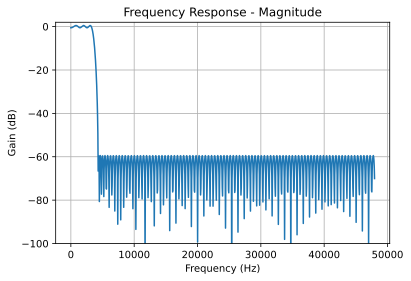

In [ ]:
# Verifikasi perolehan passband dan stopband sesuai dengan yang diharapkan
mr_up.freq_resp('db',96000)

# Penjelasan program
Program ini memanfaatkan metode `freq_resp()` dari objek `multirate_FIR` (diasumsikan sebagai `mrh`) untuk menghitung respons frekuensi dari filter FIR yang telah dirancang sebelumnya. Metode ini menerima parameter `db` untuk menghasilkan respons frekuensi dalam skala desibel (dB) dan menggunakan frekuensi sampling sebesar 96000 Hz.
# Penjelasan output
Output dari program ini adalah respons frekuensi dari filter FIR yang telah dirancang, diekspresikan dalam skala desibel (dB). Respons frekuensi ini mencakup informasi tentang penguatan atau redaman filter terhadap berbagai frekuensi dalam rentang passband dan stopband. Dengan membandingkan respons frekuensi yang dihasilkan dengan spesifikasi yang diharapkan, pengguna dapat memverifikasi apakah filter FIR memenuhi persyaratan desain yang diberikan. Misalnya, mereka dapat memastikan bahwa penguatan dalam passband sesuai dengan yang diinginkan, sementara redaman dalam stopband cukup dalam. Verifikasi ini penting untuk memastikan bahwa filter yang dirancang sesuai dengan kebutuhan aplikasi yang diperlukan.

### Perhatikan bahwa penundaan grup adalah nilai yang diharapkan dari $(N_\text{taps} - 1)/2 = 98$ sampel

In [ ]:
(len(b_up-1))/2

98.0

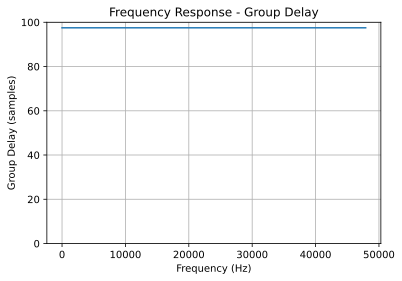

In [ ]:
# Verifikasi bahwa desain FIR memiliki penundaan grup yang konstan (N_taps - 1)/2 sampel
mr_up.freq_resp('groupdelay_s',96000,[0,100])

Objek `mr_up` sekarang dapat digunakan untuk interpolasi atau pengurangan dengan faktor perubahan tingkat 12.

# Penjelasan program
Dalam program ini, kami menggunakan metode `freq_resp()` dari objek `multirate_FIR` (diasumsikan sebagai `mrh`) untuk menghitung penundaan grup dari filter FIR yang telah dirancang sebelumnya. Metode ini menerima parameter `'groupdelay_s'` untuk menghasilkan penundaan grup dalam satuan waktu (detik) dan menggunakan frekuensi sampling sebesar 96000 Hz. Rentang frekuensi yang dianalisis adalah dari 0 Hz hingga 100 Hz, yang diberikan sebagai argumen opsional.
# Penjelasan output
Output dari program ini adalah penundaan grup dari filter FIR, diekspresikan dalam satuan waktu (detik). Penundaan grup menunjukkan seberapa banyak filter merespons terhadap perubahan frekuensi input, dengan mengukur perubahan waktu yang diperlukan untuk sinyal melewati filter. Dalam desain FIR, penundaan grup idealnya adalah konstan, yang berarti tidak ada perubahan waktu yang terjadi seiring dengan perubahan frekuensi input. Dengan memeriksa penundaan grup, pengguna dapat memverifikasi bahwa filter FIR memiliki karakteristik yang diinginkan, termasuk kestabilan dan konsistensi respon terhadap sinyal input.

Output dari program ini memberikan informasi tentang penundaan grup dari filter FIR di seluruh rentang frekuensi yang ditentukan. Dengan memeriksa output ini, pengguna dapat memverifikasi bahwa desain FIR memiliki penundaan grup yang konstan, sesuai dengan harapan dan kebutuhan aplikasi yang diperlukan.

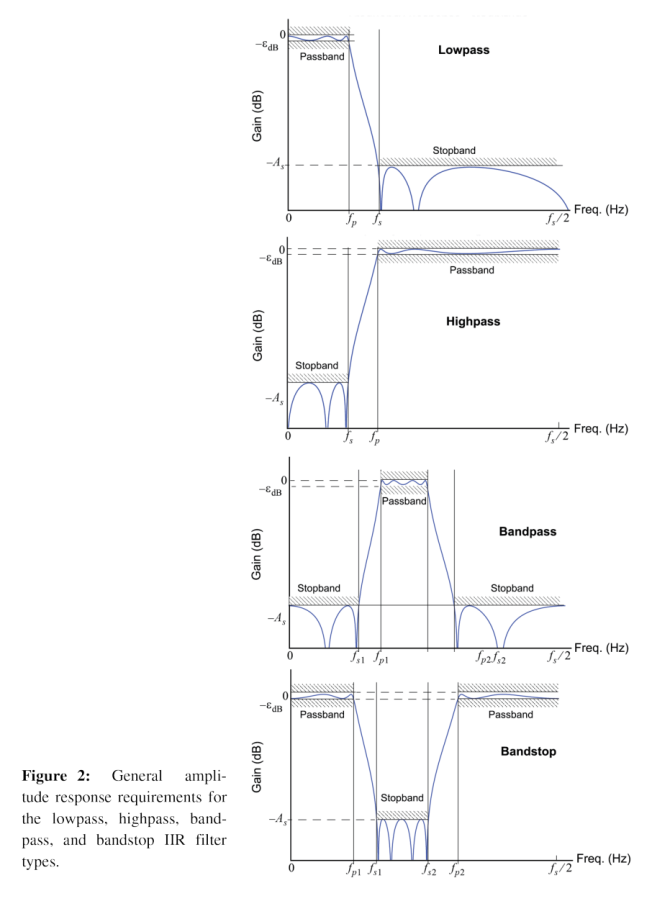

In [ ]:
img = mpimg.imread('3.png')
plt.figure(figsize=(20, 16))
plt.imshow(img)
plt.axis('off')
plt.show()

# Penjelasan program
Program ini menggunakan Matplotlib dan modul `mpimg` untuk memuat dan menampilkan gambar yang disimpan dalam file '3.png'. Pertama, gambar dimuat menggunakan fungsi `mpimg.imread()` dan disimpan dalam variabel `img`. Selanjutnya, sebuah figure baru dengan ukuran 20x16 inci dibuat menggunakan `plt.figure(figsize=(20, 16))`. Gambar dimasukkan ke dalam plot menggunakan `plt.imshow(img)`, dan sumbu gambar dihilangkan dengan `plt.axis('off')`. Akhirnya, gambar ditampilkan dengan `plt.show()`.
# Penjelasan output
Output dari program ini adalah gambar yang dimuat dari file '3.png'. Gambar tersebut ditampilkan dalam plot Matplotlib dengan ukuran 20x16 inci dan sumbu gambar dihilangkan. Gambar tersebut akan muncul di jendela pop-up atau output jika program dijalankan di lingkungan yang mendukung GUI.

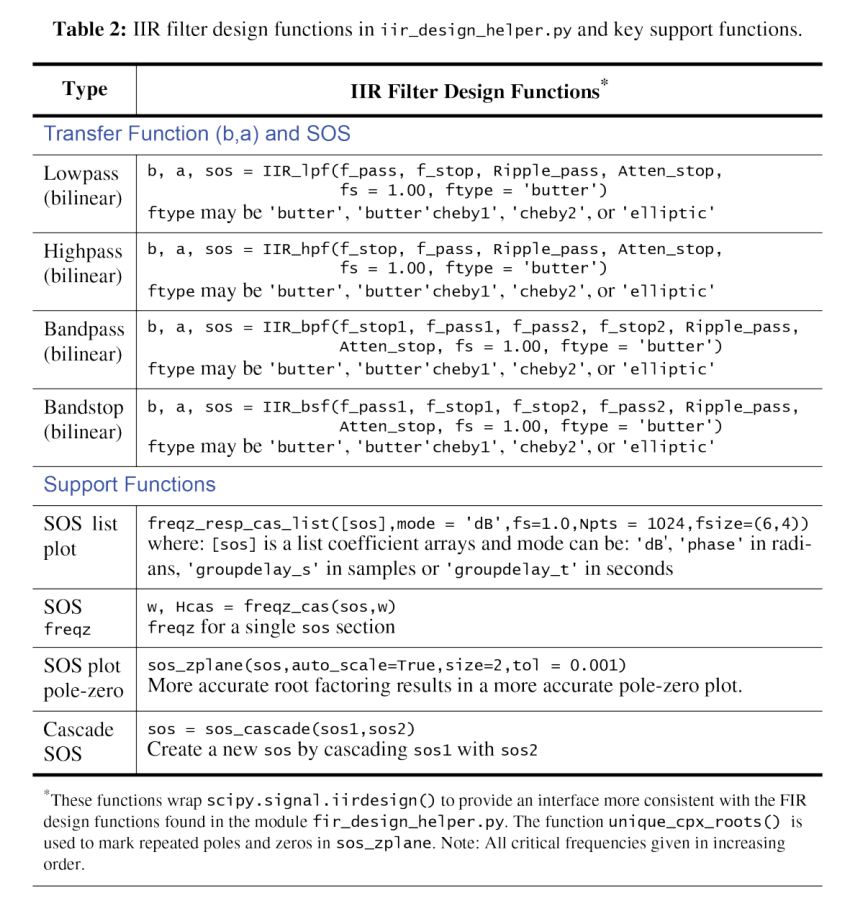

In [ ]:
img = mpimg.imread('4.png')
plt.figure(figsize=(20, 16))
plt.imshow(img)
plt.axis('off')
plt.show()

Fungsi filter dalam modul ini mengembalikan koefisien filter dalam dua format yang berbeda untuk mendukung analisis lebih lanjut dengan topologi bentuk langsung atau bentuk sos. Format pertama adalah bentuk fungsi transfer tradisional, yang terdiri dari koefisien pembilang `b` dan penyebut `a` dalam bentuk array. Sedangkan format kedua adalah bentuk kaskade bagian biquadratic menggunakan matriks sos 2D. Kedua format ini disediakan agar pengguna dapat memilih metode analisis yang paling sesuai dengan kebutuhan mereka. Pengguna juga dapat menggunakan opsi ketiga dari fungsi `signal.iirdesign()`, yaitu daftar kutub dan nol.

Dari fungsi pendukung yang tersedia, empat di antaranya dijelaskan dalam Tabel 2. Salah satu fungsi yang signifikan adalah `freqz_resp_cas_list`, yang memungkinkan pembandingan grafis dari respons frekuensi dari beberapa desain filter menggunakan matriks `sos`. Fungsi `sos_zplane` juga berguna untuk memplot pola pole-zero dari filter menggunakan matriks `sos`. Selain itu, terdapat fungsi `freqz_resp_list` yang digunakan untuk plotting respons frekuensi dalam berbagai mode, seperti penguatan dalam dB, fase dalam radian, penundaan grup dalam sampel, dan penundaan grup dalam detik, sesuai dengan laju sampling yang ditentukan dalam Hz.

Selain itu, fungsi plotting kutub-nol (`sos_zplane`) juga lebih akurat dalam menempatkan pole dan zero dibandingkan dengan metode lain, karena dapat menangani akar-akar yang berulang dan menyajikannya secara grafis dengan jelas. Semua ini membantu pengguna untuk memahami karakteristik filter dengan lebih baik dan memudahkan analisis mereka.

In [ ]:
fs = 48000
f_pass = 5000
f_stop = 8000
b_but,a_but,sos_but = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'butter')
b_cheb1,a_cheb1,sos_cheb1 = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'cheby1')
b_cheb2,a_cheb2,sos_cheb2 = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'cheby2')
b_elli,a_elli,sos_elli = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'ellip')

Dalam desain filter IIR berdasarkan transformasi bilinear, terdapat beberapa metode yang digunakan untuk memenuhi persyaratan respons amplitudo, seperti Butterworth, Chebyshev, dan sebagainya. Fungsi `signal.iirdesign()` digunakan untuk menerapkan transformasi bilinear dalam mendesain filter dengan mempertimbangkan prototipe analog yang berbeda.

Dalam contoh berikut, kita akan membandingkan desain filter lowpass dengan persyaratan respons amplitudo tertentu. Misalnya, kita ingin mendesain filter lowpass dengan spesifikasi berikut untuk frekuensi sampling $f_s = 48$ kHz:
1. Frekuensi passband $f_\text{pass} = 5$ kHz
2. Frekuensi stopband $f_\text{stop} = 8$ kHz
3. Ripple passband maksimum sebesar 0.5 dB
4. Redaman stopband minimum sebesar 60 dB




#### Frequency Response Comparison


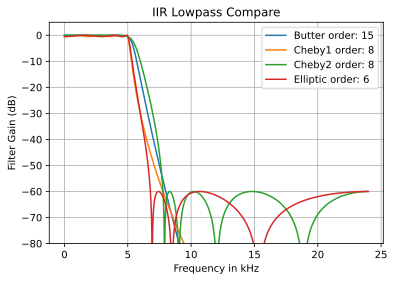

In [ ]:
iir_d.freqz_resp_cas_list([sos_but,sos_cheb1,sos_cheb2,sos_elli],'dB',fs=48)
ylim([-80,5])
title(r'IIR Lowpass Compare')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Butter order: %d' % (len(a_but)-1),
        r'Cheby1 order: %d' % (len(a_cheb1)-1),
        r'Cheby2 order: %d' % (len(a_cheb2)-1),
        r'Elliptic order: %d' % (len(a_elli)-1)),loc='best')
grid();

# Penjelasan program
Program ini menggunakan metode `freqz_resp_cas_list()` dari objek `iir_d` untuk membandingkan respons frekuensi dari empat filter IIR yang berbeda, yang masing-masing dirancang menggunakan prototipe analog Butterworth, Chebyshev tipe I, Chebyshev tipe II, dan elliptic. Metode ini menerima matriks `sos` dari setiap filter sebagai argumen masukan, bersama dengan unit yang diinginkan untuk respons frekuensi (dalam dB) dan frekuensi sampling sebesar 48 kHz.
# Penjelasan output
Output dari program ini adalah plot yang membandingkan respons frekuensi dari keempat filter IIR yang dirancang. Plot ini menunjukkan penguatan filter (dalam dB) terhadap frekuensi dalam kiloHertz. Batas sumbu y dibatasi dari -80 dB hingga 5 dB. Judul plot menunjukkan bahwa ini adalah perbandingan filter lowpass, sementara label sumbu menunjukkan frekuensi dalam kHz. Legenda pada plot mencantumkan urutan filter (Butterworth, Chebyshev tipe I, Chebyshev tipe II, dan elliptic) beserta orde masing-masing filter. Grid juga ditampilkan untuk memudahkan interpretasi plot.

Dari plot ini, pengguna dapat melihat bagaimana respons frekuensi dari masing-masing filter berbeda, terutama di dalam passband dan stopband. Perbandingan ini membantu pengguna untuk memilih filter yang paling sesuai dengan kebutuhan aplikasi mereka berdasarkan karakteristik respons frekuensi yang dihasilkan.

Selanjutnya plot konfigurasi pole-zero dari desain butterworth. Di sini kita menggunakan versi khusus dari `ss.zplane` yang bekerja dengan array 2D `sos`.

(15, 15)

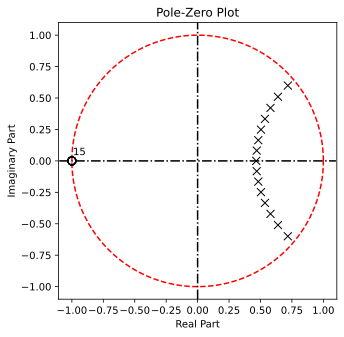

In [ ]:
iir_d.sos_zplane(sos_but)

Ketika menganalisis filter menggunakan bentuk fungsi transfer, Anda dapat menggunakan metode `iir_d.freqz_resp_list([b],[a],'dB', fs=48)` dan `sos.zplane(b, a)` untuk memvisualisasikan respons filter dalam domain frekuensi dan plot pole-zero. Namun, menggunakan bentuk Second-Order Sections (SOS) akan memberikan hasil yang lebih akurat karena bentuk ini kurang sensitif terhadap kuantisasi koefisien. Hal ini sangat penting terutama dalam plot pole-zero, di mana pengakaran polinomial tingkat tinggi bisa lebih rentan terhadap kesalahan dibandingkan dengan pengakaran polinomial kuadrat sederhana.

Sebagai contoh, pada filter Butterworth orde 15, transformasi bilinear akan memetakan 15 zero yang diharapkan pada tak hingga menjadi $z=-1$. Namun, jika Anda menggunakan `sk_dsp_comm.sigsys.zplane()`, mungkin Anda akan menemukan bahwa 15 zero tersebut terletak dalam lingkaran yang rapat di sekitar $z=-1$, menunjukkan adanya kesalahan dalam pengakaran polinomial. Oleh karena itu, respon frekuensi yang dihasilkan dari bentuk SOS akan lebih akurat.

Untuk menerapkan filter pada sinyal yang tersimpan dalam ndarray `x`, Anda dapat menggunakan desain filter dari `scipy.signal` dengan dua pendekatan. Pertama, untuk bentuk fungsi transfer, Anda bisa menggunakan `y = signal.lfilter(b,a,x)`. Kedua, untuk bentuk SOS, Anda bisa menggunakan `y = signal.sosfilt(sos,x)`. Menggunakan bentuk SOS akan memberikan kestabilan dan akurasi yang lebih baik, terutama untuk filter dengan orde tinggi.


## Desain Filter Half-Band untuk melewatkan hingga $W/2$ ketika $f_s = 8$ kHz


In [ ]:
# Elliptic IIR Lowpass
b_lp,a_lp,sos_lp = iir_d.IIR_lpf(1950,2050,0.5,80,8000.,'ellip')
mr_lp = mrh.multirate_IIR(sos_lp)

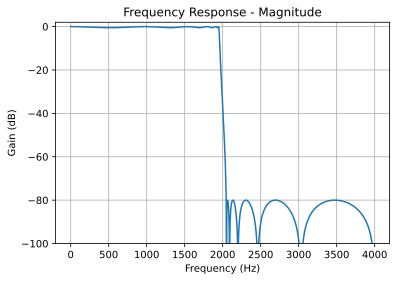

In [ ]:
mr_lp.freq_resp('db',8000)

# Penjelasan program
Program ini dirancang untuk merancang filter IIR lowpass menggunakan metode elliptic. Pertama, filter tersebut direncanakan dengan fungsi `iir_d.IIR_lpf()`, yang mengambil beberapa parameter: batas bawah frekuensi passband, batas atas frekuensi passband, ripple maksimum di passband, redaman minimum di stopband, frekuensi sampling, dan tipe filter (dalam hal ini, 'ellip' untuk elliptic). Setelah filter direncanakan, respons frekuensi filter tersebut ditampilkan menggunakan metode `freq_resp()` dari objek `multirate_IIR` (`mr_lp`). Metode ini memungkinkan pengguna untuk menentukan unit respons frekuensi yang diinginkan (dalam dB atau radians) dan frekuensi sampling. Dalam kasus ini, respons frekuensi ditampilkan dalam dB dan frekuensi sampling disetel pada 8000 Hz.
# Penjelasan output
Output dari program ini adalah plot respons frekuensi dari filter IIR lowpass yang dirancang menggunakan metode elliptic. Plot ini menunjukkan penguatan filter (dalam dB) terhadap frekuensi dalam Hz. Dari plot ini, pengguna dapat memahami karakteristik respons frekuensi dari filter tersebut, termasuk penguatan di dalam passband dan redaman di dalam stopband. Hal ini membantu pengguna untuk mengevaluasi kinerja filter dan memastikan bahwa filter memenuhi spesifikasi yang diinginkan.

(-130.0, -30.0)

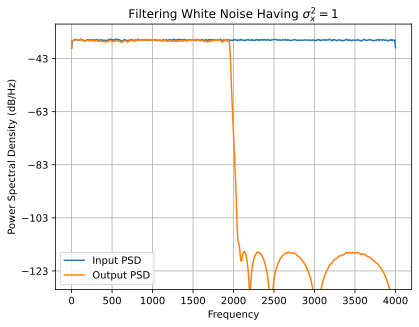

In [ ]:
x = randn(1000000)
y = mr_lp.filter(x)
psd(x,2**10,8000);
psd(y,2**10,8000);
title(r'Filtering White Noise Having $\sigma_x^2 = 1$')
legend(('Input PSD','Output PSD'),loc='best')
ylim([-130,-30])

# Penjelasan program
Program ini digunakan untuk menerapkan filter IIR lowpass yang telah dirancang sebelumnya pada sinyal input acak (`x`) menggunakan metode `filter()` dari objek `multirate_IIR` (`mr_lp`). Setelah filter diterapkan, plot spektrum daya (PSD) dari sinyal input dan output ditampilkan menggunakan fungsi `psd()`. Argumen fungsi `psd()` adalah sinyal input atau output, ukuran jendela untuk menghitung spektrum (di sini digunakan 2^10), dan frekuensi sampling (8000 Hz).
# Penjelasan output
Output dari program ini adalah plot spektrum daya (PSD) dari sinyal input dan output. Plot ini menunjukkan distribusi daya sinyal dalam domain frekuensi. Garis biru mewakili PSD sinyal input, sedangkan garis merah mewakili PSD sinyal output setelah filter diterapkan. Dengan membandingkan kedua kurva, pengguna dapat melihat bagaimana respons filter mempengaruhi distribusi daya sinyal. Pembatasan sumbu y dari -130 hingga -30 dB dilakukan untuk memperjelas perbandingan antara kedua PSD.


In [ ]:
fs = 8000
print('Expected PSD of %2.3f dB/Hz' % (0-10*log10(fs),))

Expected PSD of -39.031 dB/Hz


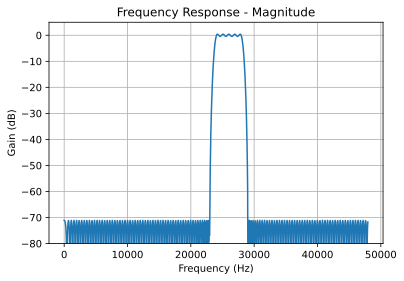

In [ ]:
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='dB',fs=96000)
ylim([-80, 5])
grid();

# Penjelasan program
Program ini bertujuan untuk merancang filter FIR bandpass menggunakan metode Remez. Pertama, filter tersebut direncanakan menggunakan fungsi `fir_d.fir_remez_bpf()`. Fungsi ini menerima beberapa parameter: batas bawah frekuensi passband, batas atas frekuensi passband, batas bawah frekuensi stopband, batas atas frekuensi stopband, ripple maksimum di passband, redaman minimum di stopband, frekuensi sampling, dan jumlah taps filter. Setelah filter direncanakan, respons frekuensi filter tersebut ditampilkan menggunakan metode `freqz_resp_list()` dari objek `fir_d`. Metode ini menerima matriks `b` (koefisien filter pembilang) dan `a` (koefisien filter penyebut) sebagai argumen masukan, bersama dengan unit yang diinginkan untuk respons frekuensi (dalam dB), dan frekuensi sampling.
# Penjelasan output
Output dari program ini adalah plot respons frekuensi dari filter FIR bandpass yang dirancang menggunakan metode Remez. Plot ini menunjukkan penguatan filter (dalam dB) terhadap frekuensi dalam Hz. Dari plot ini, pengguna dapat memahami karakteristik respons frekuensi dari filter tersebut, termasuk penguatan di dalam passband dan redaman di dalam stopband. Hal ini membantu pengguna untuk mengevaluasi kinerja filter dan memastikan bahwa filter memenuhi spesifikasi yang diinginkan. Batas sumbu y dibatasi dari -80 dB hingga 5 dB, dan grid ditampilkan untuk memudahkan interpretasi plot.

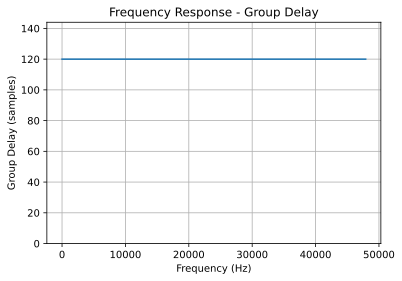

In [ ]:
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='groupdelay_s',fs=96000)
grid();

# Penjelasan program
Program ini bertujuan untuk merancang filter FIR bandpass menggunakan metode Remez. Filter tersebut direncanakan dengan menggunakan fungsi `fir_d.fir_remez_bpf()`, yang menerima beberapa parameter: batas bawah frekuensi passband, batas atas frekuensi passband, batas bawah frekuensi stopband, batas atas frekuensi stopband, ripple maksimum di passband, redaman minimum di stopband, frekuensi sampling, dan jumlah taps filter. Setelah filter direncanakan, respons frekuensi filter tersebut ditampilkan menggunakan metode `freqz_resp_list()` dari objek `fir_d`. Metode ini menerima matriks `b` (koefisien filter pembilang) dan `a` (koefisien filter penyebut) sebagai argumen masukan, bersama dengan unit yang diinginkan untuk respons frekuensi (dalam detik), dan frekuensi sampling.
# Penjelasan output
Output dari program ini adalah plot respons penundaan grup dari filter FIR bandpass yang dirancang menggunakan metode Remez. Plot ini menunjukkan penundaan grup filter (dalam detik) terhadap frekuensi dalam Hz. Dari plot ini, pengguna dapat memahami karakteristik penundaan grup dari filter tersebut, yang penting untuk aplikasi real-time dan pemrosesan sinyal waktu-nyata. Grid ditampilkan untuk memudahkan interpretasi plot.

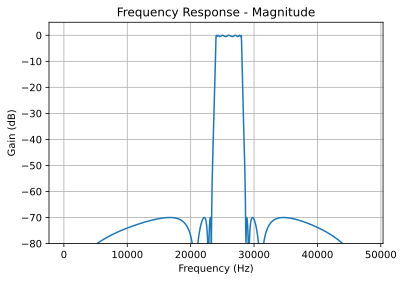

In [ ]:
b_rec_bpf2,a_rec_bpf2,sos_rec_bpf2 = iir_d.IIR_bpf(23000,24000,28000,29000,
                                                   0.5,70,96000,'ellip')
with np.errstate(divide='ignore'):
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='dB',fs=96000)
ylim([-80, 5])
grid();

# Penjelasan program
Program ini bertujuan untuk merancang filter IIR bandpass menggunakan metode elliptic. Filter tersebut direncanakan dengan menggunakan fungsi `iir_d.IIR_bpf()`, yang menerima beberapa parameter: batas bawah frekuensi passband, batas atas frekuensi passband, batas bawah frekuensi stopband, batas atas frekuensi stopband, ripple maksimum di passband, redaman minimum di stopband, frekuensi sampling, dan tipe filter (dalam hal ini, 'ellip' untuk elliptic). Setelah filter direncanakan, respons frekuensi filter tersebut ditampilkan menggunakan metode `freqz_resp_cas_list()` dari objek `iir_d`. Metode ini menerima matriks `sos` (second-order sections) sebagai argumen masukan, bersama dengan unit yang diinginkan untuk respons frekuensi (dalam dB), dan frekuensi sampling.
# Penjelasan output
Output dari program ini adalah plot respons frekuensi dari filter IIR bandpass yang dirancang menggunakan metode elliptic. Plot ini menunjukkan penguatan filter (dalam dB) terhadap frekuensi dalam Hz. Dari plot ini, pengguna dapat memahami karakteristik respons frekuensi dari filter tersebut, termasuk penguatan di dalam passband dan redaman di dalam stopband. Hal ini membantu pengguna untuk mengevaluasi kinerja filter dan memastikan bahwa filter memenuhi spesifikasi yang diinginkan. Batas sumbu y dibatasi dari -80 dB hingga 5 dB, dan grid ditampilkan untuk memudahkan interpretasi plot.

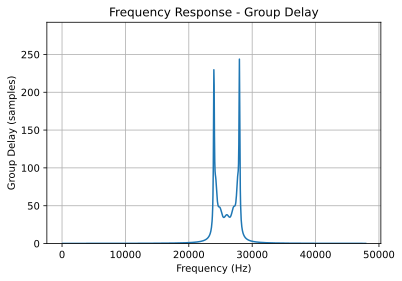

In [ ]:
with np.errstate(divide='ignore', invalid='ignore'): #manage singularity warnings
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='groupdelay_s',fs=96000)
#ylim([-80, 5])
grid();

# Penjelasan program
Program ini bertujuan untuk menampilkan respons penundaan grup dari filter IIR bandpass yang telah dirancang sebelumnya menggunakan metode elliptic. Respons penundaan grup ditampilkan menggunakan metode `freqz_resp_cas_list()` dari objek `iir_d`. Metode ini menerima matriks `sos` (second-order sections) sebagai argumen masukan, bersama dengan unit yang diinginkan untuk respons penundaan grup (dalam detik), dan frekuensi sampling.

Dalam program ini, dilakukan pengaturan untuk mengabaikan peringatan singularitas dengan menggunakan `np.errstate(divide='ignore', invalid='ignore')`, karena pada beberapa kasus, perhitungan respons penundaan grup dapat menghasilkan nilai yang tidak terdefinisi (NaN) atau singularitas yang memunculkan peringatan. Kemudian, respons penundaan grup filter IIR bandpass ditampilkan.
# Penjelasan output
Output dari program ini adalah plot respons penundaan grup dari filter IIR bandpass. Plot ini menunjukkan penundaan grup filter (dalam detik) terhadap frekuensi dalam Hz. Dengan memahami respons penundaan grup dari filter, pengguna dapat mengevaluasi karakteristik filter dalam domain waktu, yang penting untuk aplikasi real-time dan pemrosesan sinyal waktu-nyata. Grid ditampilkan untuk memudahkan interpretasi plot.